In [42]:
#importamos el archivo
import pandas as pd
data = pd.read_csv('delitos2019.csv')
# pasaremos la columna "fecha" a tipo fecha
data["fecha"] = pd.to_datetime(data["fecha"])
data.head()

,id,fecha,franja_horaria,tipo_delito,subtipo_delito,cantidad_registrada,comuna,barrio,lat,long
0,374556,2019-01-01,12,Lesiones,Siniestro Vial,1.0,4.0,Nueva Pompeya,-34.648387,-58.404748
1,426152,2019-01-01,6,Robo (con violencia),NaN,1.0,9.0,Liniers,-34.649827,-58.513859
2,371604,2019-01-01,8,Lesiones,Siniestro Vial,1.0,15.0,Chacarita,-34.588108,-58.439392
3,425359,2019-01-01,16,Hurto (sin violencia),Hurto Automotor,1.0,10.0,Floresta,-34.631877,-58.483975
4,437571,2019-01-01,2,Robo (con violencia),Robo Automotor,1.0,4.0,Parque Patricios,-34.633161,-58.397123


In [40]:
# 1: dia con mayor cantidad de delitos 
y = data[data["fecha"].dt.year == 2019]
conteo_por_dia = y.groupby("fecha")["tipo_delito"].count()
cant=conteo_por_dia.max()
dia=conteo_por_dia.idxmax()
print(f'el dia mas delictivo fue {dia} con {cant} delitos')

el dia mas delictivo fue 2019-03-11 00:00:00 con 467 delitos


Text(0.5, 1.0, 'Barrios más peligrosos')

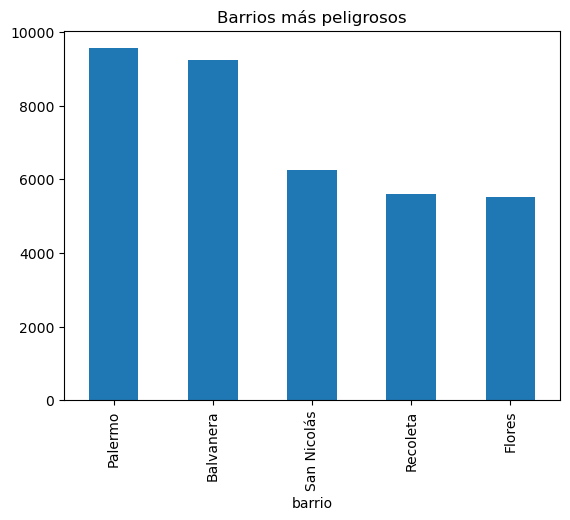

In [60]:
#2: Usar un gráfico de barras para mostrar el top 5 de barrios más peligrosos
import matplotlib.pyplot as plt
barrios = data['barrio'].value_counts().head()
barrios.plot.bar()
plt.title('Barrios más peligrosos')

Text(0.5, 1.0, 'Barrios más seguros')

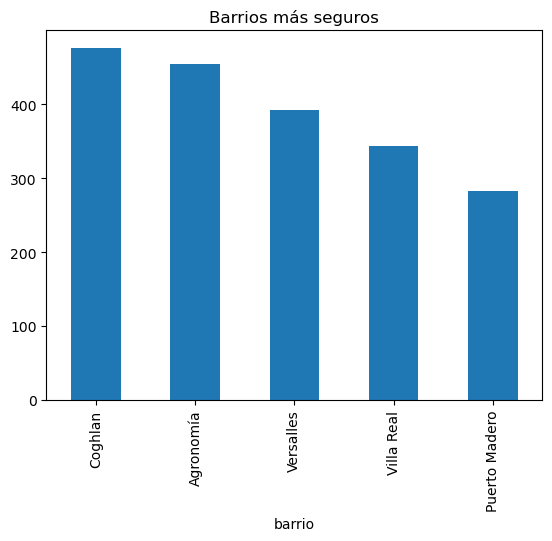

In [62]:
# 3: Usar un grafico de barras para mostrar los barrios más seguros 
barrios_s=data['barrio'].value_counts().tail()
barrios_s.plot.bar()
plt.title('Barrios más seguros')

In [71]:
# 4: Crear una nueva columna llamada 'mes' y basarse en ella para averugar cuál es el mes más inseguro
dfs = data.copy()
dfs["mes"] = dfs["fecha"].dt.month_name()
meses=dfs.groupby('mes')['tipo_delito'].count()
cant_mes= meses.max()
dia_mes = meses.idxmax()
print(f'El mes más inseguro fue {dia_mes} con {cant_mes} delitos')

El mes más inseguro fue March con 11244 delitos


<Axes: ylabel='count'>

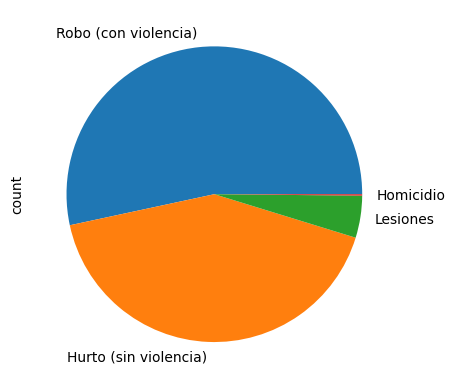

In [75]:
# 5: Realizar grafico de torta de 'Tipo de delito'
delitos=data['tipo_delito'].value_counts()
delitos.plot.pie()
plot.title('Distribución de delitos')